# Project 2
## Step 1: Exploring your data.

##### Load your data in using Pandas and start to explore. Save all of your early exploration code here and include in your final submission.

In [1]:
#Imported pandas and numpy library
import pandas as pd
import numpy as np

#Pulled billboard.csv data set
billboard = pd.read_csv('../assets/billboard.csv')

#Printed out first 5 rows of data set
billboard.head()

,year,artist.inverted,track,time,genre,date.entered,date.peaked,x1st.week,x2nd.week,x3rd.week,...,x67th.week,x68th.week,x69th.week,x70th.week,x71st.week,x72nd.week,x73rd.week,x74th.week,x75th.week,x76th.week
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,78,63.0,49.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,Santana,"Maria, Maria",4:18,Rock,2000-02-12,2000-04-08,15,8.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,Savage Garden,I Knew I Loved You,4:07,Rock,1999-10-23,2000-01-29,71,48.0,43.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000,Madonna,Music,3:45,Rock,2000-08-12,2000-09-16,41,23.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,2000-08-05,2000-10-14,57,47.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### Create a data dictionary for the data set. (ie: describe the variables of your dataset)

|Variable #|Variable|Description|
|-:||-:||-:|
|1|__Year__|Year of the Song Ranked|
|2|__Artist_Name__|Full Name of Artist (Last name, First name)| 
|3|__Track_Name__|Name or title of track/song|
|4|__Track_Lengh__|Length of track/song in Seconds|
|5|__Genre__|Type of track/song|
|6|__Date_Released__|Date of when track/song was released|
|7|__Date_Peaked__|Date of when track/song became popular|
|8|__1stweek__ - __76thweek__|Weeks starting from 1 to 76 with values of rank|
|9|__Ranking__|Contains values that show the rank of the track/song|


##### Write a brief description of your data, and any interesting observations you've made thus far. 

The data set is a complication of billboard rankings per week from week 1 (when it was realeased) to week 76. The data isn't too hard to read, but it definitely needs some cleaning. The biggest issue with this data set are missing values. They are represented by NaN (not a numerical/number). Working with a large data set without values, is almost impossible to create an analysis and prevents future experiments. There is even one missing date on the "Date_Peaked" column. In addtion, the week 13 column had a missing "e" in "week". Overall, the data set in interesting in terms of billboard rankings, however, there are necessary cleaning that needs to be done.

## Step 2: Clean your data.

##### Do some rudimentary cleaning. Rename any columns that are poorly named, shorten any strings that may be too long, fill in any missing values. 

In [2]:
#Viewed the columns and data types of data set
print billboard.columns
print billboard.get_dtype_counts()

Index([u'year', u'artist.inverted', u'track', u'time', u'genre',
       u'date.entered', u'date.peaked', u'x1st.week', u'x2nd.week',
       u'x3rd.week', u'x4th.week', u'x5th.week', u'x6th.week', u'x7th.week',
       u'x8th.week', u'x9th.week', u'x10th.week', u'x11th.week', u'x12th.week',
       u'x13th.wek', u'x14th.week', u'x15th.week', u'x16th.week',
       u'x17th.week', u'x18th.week', u'x19th.week', u'x20th.week',
       u'x21st.week', u'x22nd.week', u'x23rd.week', u'x24th.week',
       u'x25th.week', u'x26th.week', u'x27th.week', u'x28th.week',
       u'x29th.week', u'x30th.week', u'x31st.week', u'x32nd.week',
       u'x33rd.week', u'x34th.week', u'x35th.week', u'x36th.week',
       u'x37th.week', u'x38th.week', u'x39th.week', u'x40th.week',
       u'x41st.week', u'x42nd.week', u'x43rd.week', u'x44th.week',
       u'x45th.week', u'x46th.week', u'x47th.week', u'x48th.week',
       u'x49th.week', u'x50th.week', u'x51st.week', u'x52nd.week',
       u'x53rd.week', u'x54th.week', u'x5

In [3]:
#For loop that searched through the week columns and removed the 'x' and '.'
for col in billboard:
    if any([x in col for x in ['x','.']]):
        new_col = ''.join([x for x in col if x not in ['x','.']])
        #print new_col
        billboard.rename(columns ={col:new_col},inplace = True)

#Changed the column names to make it look cleaner
#The 13th column had to be remaned because it was missing an 'e' in 'week'
column_change = {
    'year':'Year',
    'artistinverted':'Artist_Name',
    'track':'Track_Name',
    'time':'Track_Length',
    'genre':'Genre',
    'dateentered':'Date_Released',
    'datepeaked':'Date_Peaked',
    '13thwek':'13thweek'
}

billboard.rename(columns=column_change,inplace=True)
billboard.head()

,Year,Artist_Name,Track_Name,Track_Length,Genre,Date_Released,Date_Peaked,1stweek,2ndweek,3rdweek,...,67thweek,68thweek,69thweek,70thweek,71stweek,72ndweek,73rdweek,74thweek,75thweek,76thweek
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,78,63.0,49.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,Santana,"Maria, Maria",4:18,Rock,2000-02-12,2000-04-08,15,8.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,Savage Garden,I Knew I Loved You,4:07,Rock,1999-10-23,2000-01-29,71,48.0,43.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000,Madonna,Music,3:45,Rock,2000-08-12,2000-09-16,41,23.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,2000-08-05,2000-10-14,57,47.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
billboard.columns

Index([u'Year', u'Artist_Name', u'Track_Name', u'Track_Length', u'Genre',
       u'Date_Released', u'Date_Peaked', u'1stweek', u'2ndweek', u'3rdweek',
       u'4thweek', u'5thweek', u'6thweek', u'7thweek', u'8thweek', u'9thweek',
       u'10thweek', u'11thweek', u'12thweek', u'13thweek', u'14thweek',
       u'15thweek', u'16thweek', u'17thweek', u'18thweek', u'19thweek',
       u'20thweek', u'21stweek', u'22ndweek', u'23rdweek', u'24thweek',
       u'25thweek', u'26thweek', u'27thweek', u'28thweek', u'29thweek',
       u'30thweek', u'31stweek', u'32ndweek', u'33rdweek', u'34thweek',
       u'35thweek', u'36thweek', u'37thweek', u'38thweek', u'39thweek',
       u'40thweek', u'41stweek', u'42ndweek', u'43rdweek', u'44thweek',
       u'45thweek', u'46thweek', u'47thweek', u'48thweek', u'49thweek',
       u'50thweek', u'51stweek', u'52ndweek', u'53rdweek', u'54thweek',
       u'55thweek', u'56thweek', u'57thweek', u'58thweek', u'59thweek',
       u'60thweek', u'61stweek', u'62ndweek', u'63

In [5]:
#Checked the total amount of 'NaN' values in each column
billboard.isnull().sum()

Year               0
Artist_Name        0
Track_Name         0
Track_Length       0
Genre              0
Date_Released      0
Date_Peaked        1
1stweek            0
2ndweek            5
3rdweek           10
4thweek           17
5thweek           25
6thweek           37
7thweek           48
8thweek           57
9thweek           64
10thweek          73
11thweek          81
12thweek          95
13thweek         107
14thweek         113
15thweek         120
16thweek         135
17thweek         140
18thweek         151
19thweek         161
20thweek         171
21stweek         252
22ndweek         262
23rdweek         269
                ... 
47thweek         312
48thweek         313
49thweek         313
50thweek         313
51stweek         313
52ndweek         313
53rdweek         313
54thweek         315
55thweek         315
56thweek         315
57thweek         315
58thweek         315
59thweek         315
60thweek         315
61stweek         315
62ndweek         315
63rdweek     

##### Using Pandas' built in `melt` function, pivot the weekly ranking data to be long rather than wide. As a result, you will have removed the 72 'week' columns and replace it with two: Week and Ranking. There will now be multiple entries for each song, one for each week on the Billboard rankings.

In [6]:
#Used the format to change wide format to long format with the pd.melt pandas function
subject_ids = np.arange(1, billboard.shape[0]+1)
print billboard.shape
print subject_ids.shape

billboard['ID'] = subject_ids


billboard_long = pd.melt(billboard,
                        id_vars = ['ID','Year','Artist_Name','Track_Name','Track_Length','Genre','Date_Released',
                                   'Date_Peaked'],
                        value_vars=None,
                        var_name='Week',
                        value_name='Ranking'
                        )
billboard_long.tail()

(317, 83)
(317,)


,ID,Year,Artist_Name,Track_Name,Track_Length,Genre,Date_Released,Date_Peaked,Week,Ranking
24087,313,2000,Ghostface Killah,Cherchez LaGhost,3:04,R&B,2000-08-05,2000-08-05,76thweek,NaN
24088,314,2000,"Smith, Will",Freakin' It,3:58,Rap,2000-02-12,2000-02-12,76thweek,NaN
24089,315,2000,Zombie Nation,Kernkraft 400,3:30,Rock,2000-09-02,2000-09-02,76thweek,NaN
24090,316,2000,"Eastsidaz, The",Got Beef,3:58,Rap,2000-07-01,2000-07-01,76thweek,NaN
24091,317,2000,Fragma,Toca's Miracle,3:22,R&B,2000-10-28,2000-10-28,76thweek,NaN


In [7]:
#Created a mask to hid the NaN cells
mask = np.isnan(billboard_long['Ranking'])
billboard_nan = billboard_long[~mask]
billboard_nan.tail()

,ID,Year,Artist_Name,Track_Name,Track_Length,Genre,Date_Released,Date_Peaked,Week,Ranking
19663,10,2000,Lonestar,Amazed,4:25,Country,1999-06-05,2000-03-04,63rdweek,45.0
19700,47,2000,Creed,Higher,5:16,Rock,1999-09-11,2000-07-22,63rdweek,50.0
19980,10,2000,Lonestar,Amazed,4:25,Country,1999-06-05,2000-03-04,64thweek,50.0
20017,47,2000,Creed,Higher,5:16,Rock,1999-09-11,2000-07-22,64thweek,50.0
20334,47,2000,Creed,Higher,5:16,Rock,1999-09-11,2000-07-22,65thweek,49.0


In [8]:
print billboard_long.shape
print billboard_nan.shape

(24092, 10)
(5307, 10)


In [9]:
#Converted the 'Ranking' column for all values to be in integers
billboard_nan['Ranking'] = billboard_nan['Ranking'].map(lambda x: int(x))

billboard_nan.tail()

/Users/jrcmalunay/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,ID,Year,Artist_Name,Track_Name,Track_Length,Genre,Date_Released,Date_Peaked,Week,Ranking
19663,10,2000,Lonestar,Amazed,4:25,Country,1999-06-05,2000-03-04,63rdweek,45
19700,47,2000,Creed,Higher,5:16,Rock,1999-09-11,2000-07-22,63rdweek,50
19980,10,2000,Lonestar,Amazed,4:25,Country,1999-06-05,2000-03-04,64thweek,50
20017,47,2000,Creed,Higher,5:16,Rock,1999-09-11,2000-07-22,64thweek,50
20334,47,2000,Creed,Higher,5:16,Rock,1999-09-11,2000-07-22,65thweek,49


In [10]:
#Converted the 'Track_Length' column from minutes to seconds
to_seconds = lambda time:sum(map(lambda mi,sec: int(mi)*sec, time.split(':'),(60,1)))

billboard_nan['Track_Length'] = billboard_long['Track_Length'].apply(to_seconds)
billboard_nan.head()

/Users/jrcmalunay/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,ID,Year,Artist_Name,Track_Name,Track_Length,Genre,Date_Released,Date_Peaked,Week,Ranking
0,1,2000,Destiny's Child,Independent Women Part I,218,Rock,2000-09-23,2000-11-18,1stweek,78
1,2,2000,Santana,"Maria, Maria",258,Rock,2000-02-12,2000-04-08,1stweek,15
2,3,2000,Savage Garden,I Knew I Loved You,247,Rock,1999-10-23,2000-01-29,1stweek,71
3,4,2000,Madonna,Music,225,Rock,2000-08-12,2000-09-16,1stweek,41
4,5,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),218,Rock,2000-08-05,2000-10-14,1stweek,57


## Step 3: Visualize your data.

##### Using a plotting utility of your choice, create visualizations that will provide context to your data. There is no minimum or maximum number of graphs you should generate, but there should be a clear and consistent story being told. Give insights to the distribution, statistics, and relationships of the data. 

/Users/jrcmalunay/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:16: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


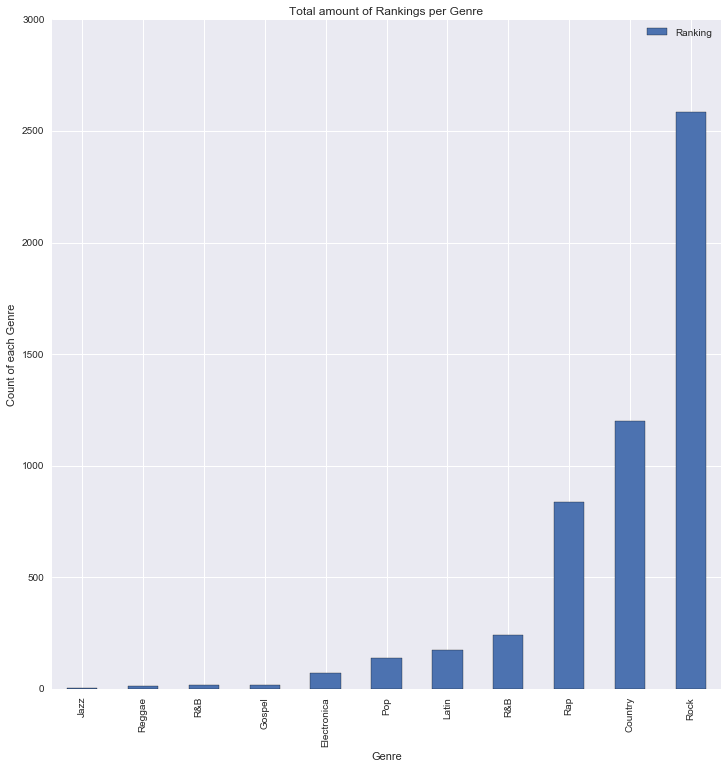

In [12]:
# data modules
import numpy as np
import scipy.stats as stats
import pandas as pd

# plotting modules
import matplotlib.pyplot as plt
import seaborn as sns

# make sure charts appear in the notebook:
%matplotlib inline

sns.set(rc={"figure.figsize": (12, 12)})

rank_genre = billboard_nan[['Genre','Ranking']].groupby(['Genre']).count()
rank_vs_genre = rank_genre.sort('Ranking').plot(kind='bar',stacked=True)
rank_vs_genre.set_ylabel("Count of each Genre")
rank_vs_genre.set_title('Total amount of Rankings per Genre')


In [40]:
sns.set(rc={"figure.figsize": (12, 12)})
pd.to_datetime(billboard_nan['Date_Peaked'])
pd.to_datetime(billboard_nan['Date_Released'])


#sns.tsplot(billboard_nan[['Date_Peaked']])
#billboard_nan[['Date_Peaked']].dtypes
#billboard_nan[['Date_Released']]

0       2000-09-23
1       2000-02-12
2       1999-10-23
3       2000-08-12
4       2000-08-05
5       2000-06-17
6       1999-12-25
7       2000-04-01
8       2000-06-24
9       1999-06-05
10      2000-05-06
11      1999-11-27
12      2000-01-22
13      2000-05-13
14      2000-03-18
15      2000-04-29
16      1999-12-11
17      1999-11-06
18      2000-08-19
19      2000-09-30
20      2000-03-18
21      2000-02-26
22      2000-08-19
23      2000-05-13
24      2000-04-08
25      2000-01-29
26      2000-04-15
27      1999-09-04
28      2000-01-01
29      1999-10-23
           ...    
16184   1999-11-06
16191   2000-04-08
16213   1999-09-11
16493   1999-06-05
16501   1999-11-06
16508   2000-04-08
16530   1999-09-11
16810   1999-06-05
16847   1999-09-11
17127   1999-06-05
17164   1999-09-11
17444   1999-06-05
17481   1999-09-11
17761   1999-06-05
17798   1999-09-11
18078   1999-06-05
18115   1999-09-11
18395   1999-06-05
18432   1999-09-11
18712   1999-06-05
18749   1999-09-11
19029   1999

## Step 4: Create a Problem Statement.

##### Having explored the data, come up with a problem statement for this data set. You can feel free to introduce data from any other source to support your problem statement, just be sure to provide a link to the origin of the data. Once again- be creative!

Rock, country, and hip hop music has been a dominant category over the years and even til this day. However, pop culture has lead to newer types of genres such as mash ups and remixes. For example, electro music is mashing up with hip hop, country with hip hop, and much more. From 2000 to 2010, there are genres such as dubstep and trip hop. Regardless of new types of music, rock, country, and hip hop music will be the three top genres in the next 20+ years. These three categories have boomed in the music industry and will contintue to be in the near future.

## Step 5: Brainstorm your Approach.
##### In bullet-list form, provide a proposed approach for evaluating your problem statement. This can be somewhat high-level, but start to think about ways you can massage the data for maximum efficacy. 

- CLEAN DATA!
- Collect all Billboard data sets, even from the beginning (1940s/1950s)
- Sort the data and determine the top genres 
- Determine patterns 
- Be sure to collect reasonable data

## Step 6: Create a blog post with your code snippets and visualizations.
##### Data Science is a growing field, and the Tech industry thrives off of collaboration and sharing of knowledge. Blogging is a powerful means for pushing the needle forward in our field. Using your blogging platform of choice, create a post describing each of the 5 steps above. Rather than writing a procedural text, imagine you're describing the data, visualizations, and conclusions you've arrived at to your peers. Aim for roughly 800-1,000 words. 

## BONUS: The Content Managers working for the Podcast Publishing Company have recognized you as a thought leader in your field. They've asked you to pen a white paper (minimum 600 words) on the subject of 'What It Means To Have Clean Data'. This will be an opinion piece read by a wide audience, so be sure to back up your statements with real world examples or scenarios.

##### Hint: To get started, look around on the internet for articles, blog posts, papers, youtube videos, podcasts, reddit discussions, anything that will help you understand the challenges and implications of dealing with big data. This should be a personal reflection on everything you've learned this week, and the learning goals that have been set out for you going forward. 